# Random matrix valued stochastic processes

The multilinear generalization of a stochastic processes falls naturally in the domain of random matrix theory. The distributions of the process are now taken to be Gaussian Haar measures on $GL(N)^{k}$ where $k$ indexes time steps. Let's start by building a Gaussian unitary matrix valued random proc.

In [46]:
from rmt.ensembles import gue
import numpy as np
import matplotlib.pyplot as plt

In [48]:
t = np.linspace(0, 1, 100-1)
n = 10
gaussian_step = [np.zeros([n, n])]+[gue(n) for _ in range(0, len(t))]
w = np.cumsum(gaussian_step, axis=0)

The process w is matrix valued in that $w(t)\in U(N)$ $\forall t\in [-, 1]$. A standard feature of all standard random ensembles is level repulsion: The spacing of eigenvalues are distributed in such a way that $|\lambda_i-\lambda_{i+1}|>0$. Then, it must be that the spectrum of the Brownian motion just constructed must exhibit level repulsion as well. In other words, we expect the spectral paths to be non-intersecting for any $N>1$:

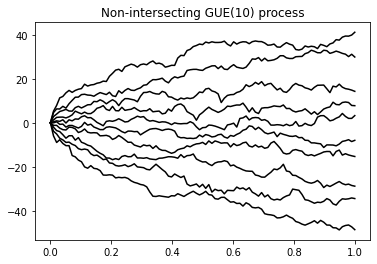

In [49]:
w_spec = [np.linalg.eigvalsh(h) for h in w]
plt.plot(t, w_spec[:-1], 'k')
plt.title(f"Non-intersecting GUE({n}) process");

## Non-intersecting Brownian bridge

It might be interesting to be able to simulate a process that attains a fixed value at times $t=0$ and $t=1$ that does so without self intersection. The standard construction of a Brownian bridge from a process $W(t)$ is via
$$
B(t)\equiv W(t)-tW(1)
$$
so that $B(0)=B(1)$.

In [222]:
n = 20
t = np.linspace(0, 1, 100)
gaussian_step = [np.zeros([n, n])]+[gue(n) for _ in range(0, len(t)-1)]
w = np.cumsum(gaussian_step, axis=0)
b = w-np.tile(t, (n**2,1)).T.reshape(len(t), n, n)*w[-1, :,:]
b_spec = np.array([np.linalg.eigvalsh(h) for h in b])
b_spec /= b_spec.max()



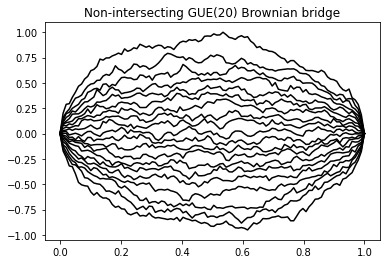

In [225]:
plt.title(f"Non-intersecting GUE({n}) Brownian bridge");
plt.plot(t,b_spec, 'k');


### Airy scaling

Now introduce the coordinate reparameterization
$$
(x, t) = \left(\frac{\sqrt{2n}}{2\cosh \sigma}, \frac{e^{\sigma}}{2\cosh\sigma}\right)
$$
...
TODO: Fredholm determinant procs.  